## Weather Forecasting Project

Here, the weather dataset is a time-series data set with per-hour information about the weather conditions at a particular location. It records temperature, dew point temperature, relative humidity, wind speed, visibility, pressure and weather description.

### Importing Libraries

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
from itertools import chain
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import pickle

In [37]:
df = pd.read_csv("weather-data.csv")

In [3]:
df.head()

,Date/Time,Temperature (in Degree Celsius),Dew Point Temperature (in Degree Celsius),Relative Humidity (in %),Wind Speed (in km/h),Visibility (in km),Pressure (in kilopascal),Weather Description
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [4]:
#dimension
df.shape

(8784, 8)

In [5]:
#column names
df.columns

Index(['Date/Time', 'Temperature (in Degree Celsius)',
       'Dew Point Temperature (in Degree Celsius)', 'Relative Humidity (in %)',
       'Wind Speed (in km/h)', 'Visibility (in km)',
       'Pressure (in kilopascal)', 'Weather Description'],
      dtype='object')

In [6]:
#data types
df.dtypes

Date/Time                                     object
Temperature (in Degree Celsius)              float64
Dew Point Temperature (in Degree Celsius)    float64
Relative Humidity (in %)                       int64
Wind Speed (in km/h)                           int64
Visibility (in km)                           float64
Pressure (in kilopascal)                     float64
Weather Description                           object
dtype: object

In [7]:
#information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Date/Time                                  8784 non-null   object 
 1   Temperature (in Degree Celsius)            8784 non-null   float64
 2   Dew Point Temperature (in Degree Celsius)  8784 non-null   float64
 3   Relative Humidity (in %)                   8784 non-null   int64  
 4   Wind Speed (in km/h)                       8784 non-null   int64  
 5   Visibility (in km)                         8784 non-null   float64
 6   Pressure (in kilopascal)                   8784 non-null   float64
 7   Weather Description                        8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [8]:
#statistical description
df.describe()

,Temperature (in Degree Celsius),Dew Point Temperature (in Degree Celsius),Relative Humidity (in %),Wind Speed (in km/h),Visibility (in km),Pressure (in kilopascal)
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


In [38]:
# Set 'date/time' as the index
df['Date/Time'] = pd.to_datetime(df['Date/Time'])
df.head()

,Date/Time,Temperature (in Degree Celsius),Dew Point Temperature (in Degree Celsius),Relative Humidity (in %),Wind Speed (in km/h),Visibility (in km),Pressure (in kilopascal),Weather Description
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


#### To find unique instances of weather types

In [9]:
df['Weather Description'].unique()

array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
       'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,Fog',
       'Moderate Rain,Fog', 'Freezing Rain,Ice Pellets,Fog',
       'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow', 'Rain,Ice Pellets',
       'Drizzle,Snow,Fog', 

## Data Preprocessing

## Convert the Weather Categories into Standard Categories

In [13]:
x = 'Thunderstorms,Moderate Rain Showers,Fog'

In [14]:
list_of_list = [w.split() for w in x.split(',')]
list_of_list

[['Thunderstorms'], ['Moderate', 'Rain', 'Showers'], ['Fog']]

In [17]:
flat_list =list(chain(*list_of_list))
flat_list

['Thunderstorms', 'Moderate', 'Rain', 'Showers', 'Fog']

In [18]:
def Create_list(x):
    list_of_list = [w.split() for w in x.split(',')]
    flat_list =list(chain(*list_of_list))
    return flat_list

In [22]:
def Get_Weather(list1):
    if 'Fog' in list1 and 'Rain' in list1:
        return 'RAIN+FOG'
    elif 'Snow' in list1 and 'Rain' in list1:
        return 'SNOW+RAIN'
    elif 'Snow' in list1:
        return 'SNOW'
    elif 'Rain' in list1:
        return 'RAIN'
    elif 'Fog' in list1:
        return 'FOG'
    elif 'Clear' in list1:
        return 'CLEAR'
    elif 'Cloudy' in list1:
        return 'CLOUDY'
    else:
        return 'RAIN'

In [23]:
Create_list(x)

['Thunderstorms', 'Moderate', 'Rain', 'Showers', 'Fog']

In [24]:
Get_Weather(Create_list(x))

'RAIN+FOG'

In [39]:
df['Weather'] = df['Weather Description'].apply(lambda x : Get_Weather(Create_list(x)))

In [40]:
df.head()

,Date/Time,Temperature (in Degree Celsius),Dew Point Temperature (in Degree Celsius),Relative Humidity (in %),Wind Speed (in km/h),Visibility (in km),Pressure (in kilopascal),Weather Description,Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,FOG
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,FOG
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",FOG
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",FOG
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog,FOG


In [41]:
df.Weather.value_counts()

CLOUDY       3797
CLEAR        3432
RAIN          603
SNOW          556
FOG           241
RAIN+FOG      129
SNOW+RAIN      26
Name: Weather, dtype: int64

### Sample Selection of 4 Categories

In [42]:
cloudy_df=df[df['Weather']=='CLOUDY'].sample(600)

In [43]:
clear_df=df[df['Weather']=='CLEAR'].sample(600)

In [44]:
rain_df=df[df['Weather']=='RAIN']

In [45]:
snow_df=df[df['Weather']=='SNOW']

In [46]:
weather_df = pd.concat([cloudy_df,clear_df,rain_df,snow_df],axis=0)

In [47]:
weather_df.head()

,Date/Time,Temperature (in Degree Celsius),Dew Point Temperature (in Degree Celsius),Relative Humidity (in %),Wind Speed (in km/h),Visibility (in km),Pressure (in kilopascal),Weather Description,Weather
4122,2012-06-20 18:00:00,32.4,19.9,48,17,24.1,100.61,Mostly Cloudy,CLOUDY
5019,2012-07-28 03:00:00,18.7,14.3,76,11,25.0,101.09,Mostly Cloudy,CLOUDY
2724,2012-04-23 12:00:00,4.6,1.9,83,46,24.1,99.09,Cloudy,CLOUDY
2405,2012-04-10 05:00:00,4.0,1.6,84,9,24.1,99.39,Cloudy,CLOUDY
8214,2012-12-08 06:00:00,2.4,0.3,86,9,25.0,101.05,Cloudy,CLOUDY


### Drop Irrelevant Columns

In [48]:
weather_df.drop(columns = ['Date/Time', 'Weather Description'],axis=1,inplace=True)

## Correlation

In [50]:
cols= ['Temperature (in Degree Celsius)','Dew Point Temperature (in Degree Celsius)','Relative Humidity (in %)','Wind Speed (in km/h)','Visibility (in km)','Pressure (in kilopascal)']

In [51]:
cor_matrix = weather_df[cols].corr()

<Axes: >

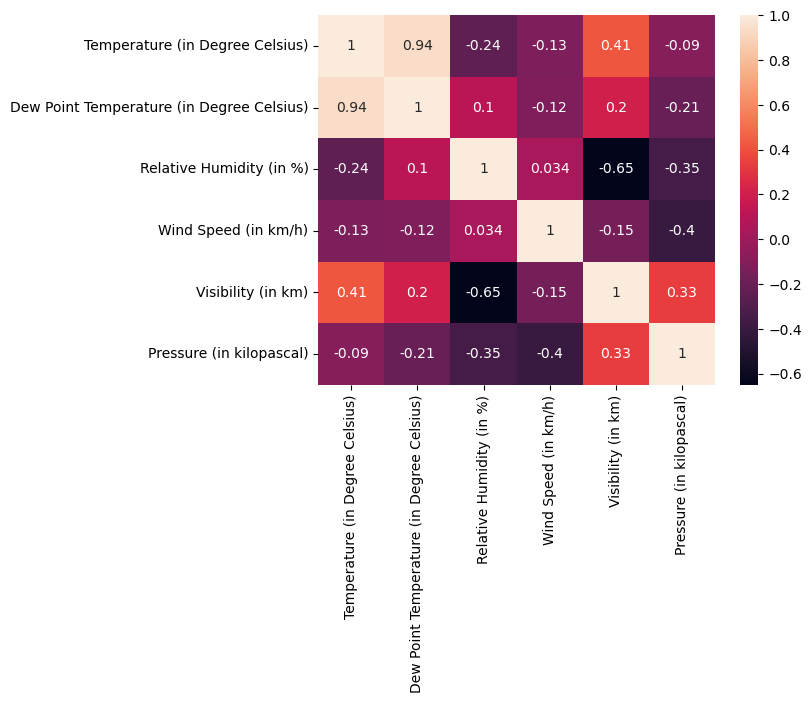

In [54]:
sns.heatmap(cor_matrix,annot=True)

## Visualisation

<Axes: ylabel='Frequency'>

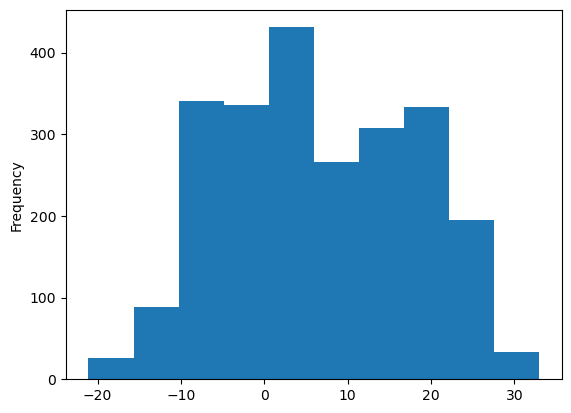

In [56]:
weather_df['Temperature (in Degree Celsius)'].plot(kind='hist')

<Axes: ylabel='Frequency'>

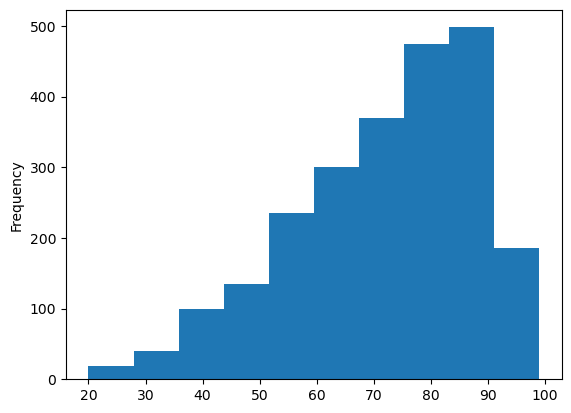

In [57]:
weather_df['Relative Humidity (in %)'].plot(kind='hist')

<Axes: >

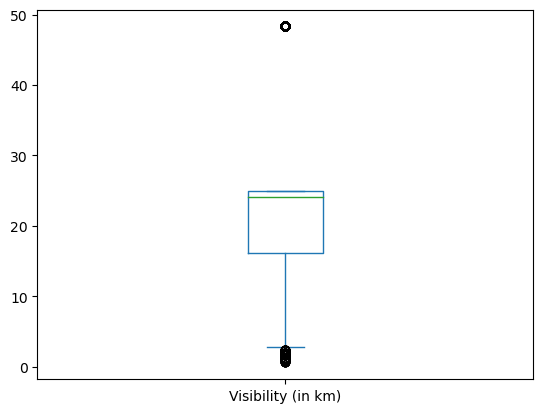

In [58]:
weather_df['Visibility (in km)'].plot(kind='box')

<Axes: xlabel='Pressure (in kilopascal)', ylabel='Count'>

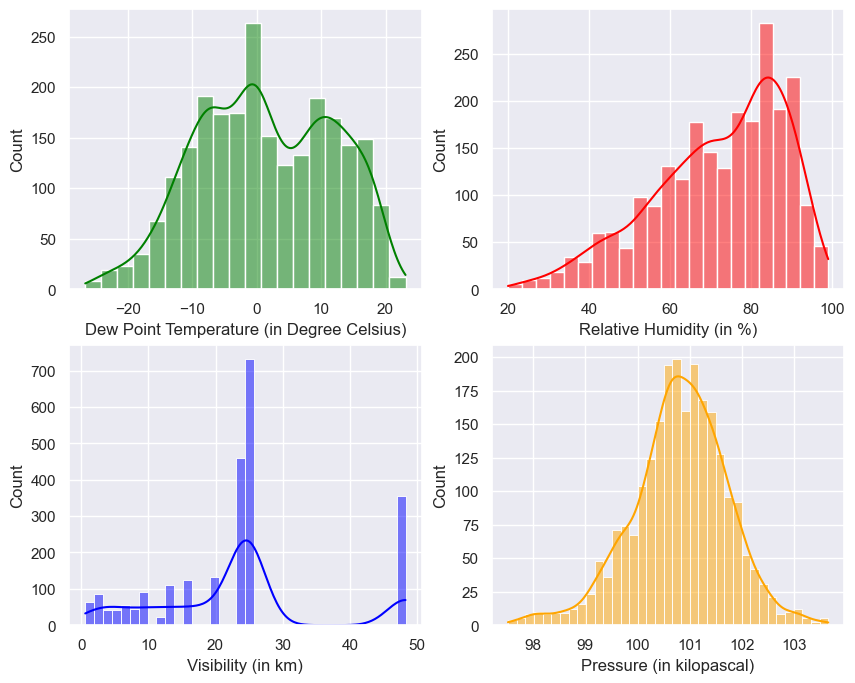

In [64]:
sns.set(style='darkgrid')
fig,axs=plt.subplots(2,2,figsize=(10,8))
sns.histplot(data=weather_df,x='Dew Point Temperature (in Degree Celsius)',kde=True,ax=axs[0,0],color='green')
sns.histplot(data=weather_df,x='Relative Humidity (in %)',kde=True,ax=axs[0,1],color='red')
sns.histplot(data=weather_df,x='Visibility (in km)',kde=True,ax=axs[1,0],color='blue')
sns.histplot(data=weather_df,x='Pressure (in kilopascal)',kde=True,ax=axs[1,1],color='orange')

## Label Encoding

In [60]:
label_encoder=LabelEncoder()

In [61]:
weather_df['Weather']=label_encoder.fit_transform(weather_df['Weather'])

In [62]:
label_encoder.classes_

array(['CLEAR', 'CLOUDY', 'RAIN', 'SNOW'], dtype=object)

In [63]:
weather_df.head()

,Temperature (in Degree Celsius),Dew Point Temperature (in Degree Celsius),Relative Humidity (in %),Wind Speed (in km/h),Visibility (in km),Pressure (in kilopascal),Weather
4122,32.4,19.9,48,17,24.1,100.61,1
5019,18.7,14.3,76,11,25.0,101.09,1
2724,4.6,1.9,83,46,24.1,99.09,1
2405,4.0,1.6,84,9,24.1,99.39,1
8214,2.4,0.3,86,9,25.0,101.05,1


## Independent & Dependent Variables

In [65]:
X=weather_df.drop(['Weather'],axis=1)

In [66]:
y=weather_df['Weather']

## Feature Scaling

In [68]:
std_scaler = StandardScaler()

In [69]:
X_std=std_scaler.fit_transform(X)

## Train Test Splitting

In [71]:
X_train,X_test,y_train,y_test=train_test_split(X_std,y,test_size=0.2,random_state=42)

In [72]:
X_train.shape,X_test.shape

((1887, 6), (472, 6))

## Model

In [75]:
decision_tree=DecisionTreeClassifier()

## Model Training

In [76]:
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier()

## Predictions:

In [77]:
y_pred=decision_tree.predict(X_test)

## Evaluation

In [79]:
accuracy_score(y_test,y_pred)

0.6207627118644068

In [80]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.63      0.63      0.63       118
           1       0.47      0.43      0.45       128
           2       0.63      0.66      0.64       126
           3       0.76      0.81      0.79       100

    accuracy                           0.62       472
   macro avg       0.62      0.63      0.63       472
weighted avg       0.62      0.62      0.62       472



<Axes: >

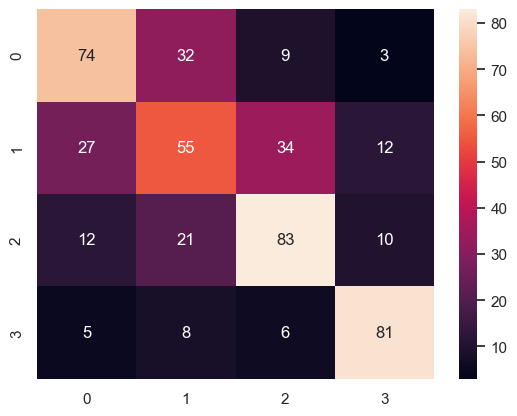

In [81]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d')

## Multiple Models

In [109]:
rf=RandomForestClassifier()
svc_m=SVC()
knn=KNeighborsClassifier()
lr=LogisticRegression()
nb=GaussianNB()
gb_classifier = GradientBoostingClassifier()

In [110]:
model_list=[decision_tree,rf,svc_m,knn,lr,nb]

In [111]:
acc_list=[]
for model in model_list:
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    acc_list.append(acc)

In [112]:
acc_list

[0.6122881355932204,
 0.6758474576271186,
 0.5889830508474576,
 0.6398305084745762,
 0.5741525423728814,
 0.5741525423728814]

Best Accuracy for Randorm Forest

In [113]:
model_df=pd.DataFrame({'Model':model_list,'Accuracy':acc_list})

In [114]:
model_df

,Model,Accuracy
0,DecisionTreeClassifier(),0.612288
1,"(DecisionTreeClassifier(max_features='sqrt', r...",0.675847
2,SVC(),0.588983
3,KNeighborsClassifier(),0.639831
4,LogisticRegression(),0.574153
5,GaussianNB(),0.574153


## K Fold Cross Validation

In [115]:
scores=cross_val_score(gb_classifier,X_std,y,cv=5,scoring='accuracy')

In [116]:
print(scores)

[0.58686441 0.63347458 0.58050847 0.57838983 0.70700637]


In [117]:
scores.mean()

0.617248731512469

## Hyparameter Tuning

In [118]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7]
}

In [121]:
grid_search = GridSearchCV(gb_classifier, param_grid,cv=5, scoring='accuracy', n_jobs=-1)

In [122]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

### Best Hyper Parameters

In [123]:
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}

In [124]:
best_estimator=grid_search.best_estimator_

In [125]:
scores=cross_val_score(best_estimator,X_std,y,cv=5,scoring='accuracy')
scores.mean()

0.5968764619093886

In [126]:
y_pred_new = best_estimator.predict(X_test)

In [127]:
accuracy_score(y_test,y_pred_new)

0.6483050847457628

## Prediction on New Data

In [128]:
new_data = [[32.4, 19.9, 48, 17, 24.1, 100.61]]

In [129]:
predictions = best_estimator.predict(new_data)

In [130]:
# Define mapping between numeric labels and weather conditions
label_to_weather = {1: 'CLEAR', 2: 'CLOUDY', 3: 'RAIN', 4: 'SNOW'}


In [133]:
# Map predictions to target labels
predicted_weather = label_to_weather[predictions[0]]

print("Predicted Weather Condition:", predicted_weather)

Predicted Weather Condition: CLEAR


### Save the Model

In [134]:
# Save the model to a file
with open('model.pkl', 'wb') as f:
    pickle.dump(best_estimator, f)